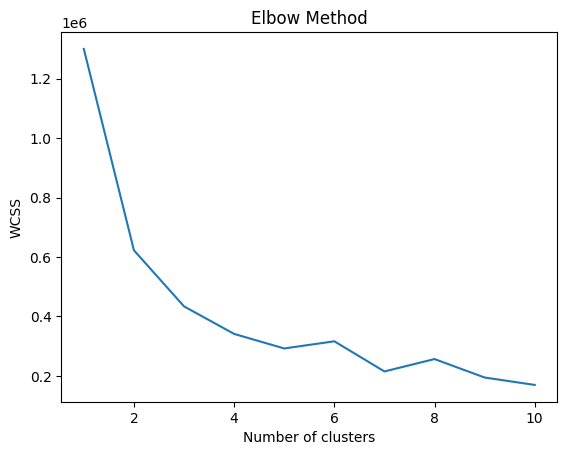

MemoryError: Unable to allocate 1022. MiB for an array with shape (206, 650000) and data type float64

In [1]:
import pandas as pd
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 1. Load the Data
data = pd.read_csv("C:/Users/abdulssekyanzi/EDA Dataset.csv/100.csv") # Replace "your_data.csv"

# 2. Preprocessing
# Drop the time and Unnamed columns, as we want to cluster based on the MLII and V5 signals.
features = data[['MLII', 'V5']]

# Scale the data. This is crucial for k-means, as it's distance-based.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# 3. Determine the Optimal Number of Clusters (k)
# Use the Elbow Method or Silhouette Score.

# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300, batch_size=100)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Silhouette Score Method
silhouette_scores = []
for i in range(2, 11):
    kmeans = MiniBatchKMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10, max_iter=300, batch_size=100)
    kmeans.fit(scaled_features)
    silhouette_scores.append(silhouette_score(scaled_features, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Choose a value for k based on the graphs.
k = 4 # example, change this value based on the graphs.

# 4. Train the MiniBatchKMeans Model
kmeans = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=42, n_init=10, max_iter=300, batch_size=100)
kmeans.fit(scaled_features)

# 5. Evaluate the Model
# Calculate Silhouette Score
silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")

# If you have the ground truth labels, you can calculate ARI:
# labels_true = data['true_labels']  # Replace with your actual label column
# ari = adjusted_rand_score(labels_true, kmeans.labels_)
# print(f"Adjusted Rand Index: {ari}")

# 6. Visualize the Clusters (If 2D)
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*')
plt.title("MiniBatchKMeans Clustering")
plt.xlabel("Scaled MLII")
plt.ylabel("Scaled V5")
plt.show()
